In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

In [ ]:
base_model=MobileNet(weights='imagenet',include_top=False) 

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
x=Dense(512,activation='relu')(x) 
preds=Dense(2,activation='softmax')(x) 

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [ ]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, None, None, 32)    0     

In [ ]:

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/Active/valid/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 4150 images belonging to 2 classes.


In [ ]:

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size 
history = model.fit(train_generator,steps_per_epoch=step_size_train,epochs=5)

Epoch 1/5
129/129 [==============================] - 2233s 17s/step - loss: 0.2713 - accuracy: 0.9007
Epoch 2/5
129/129 [==============================] - 565s 4s/step - loss: 0.0905 - accuracy: 0.9648
Epoch 3/5
129/129 [==============================] - 557s 4s/step - loss: 0.0599 - accuracy: 0.9779
Epoch 4/5
129/129 [==============================] - 561s 4s/step - loss: 0.0509 - accuracy: 0.9854
Epoch 5/5
129/129 [==============================] - 577s 4s/step - loss: 0.1006 - accuracy: 0.9714


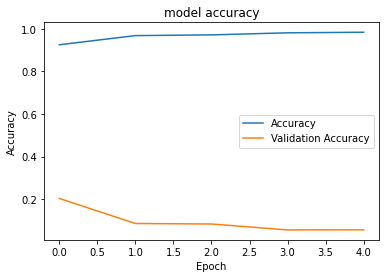

In [ ]:
#Check results
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
import numpy as np
images = np.array(['Cat','Dog'])

Dog


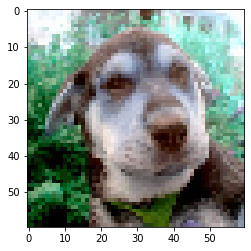

In [ ]:
import matplotlib.pyplot as plt
import cv2
im = cv2.imread('/content/drive/MyDrive/Active/do/train/dog/18.jpg')
im = cv2.resize(im,(60,60))

im = im.reshape(1,60,60,3)
im_n = im/im.max()

print(images[np.argmax(model.predict(im_n))])
import matplotlib.pyplot as plt
plt.imshow(im.reshape(60,60,3))
plt.show()

Cat


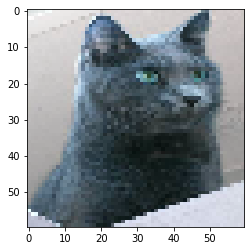

In [ ]:
import matplotlib.pyplot as plt
im = cv2.imread('/content/drive/MyDrive/Active/do/valid/cat/11.jpg')
im = cv2.resize(im,(60,60))

im = im.reshape(1,60,60,3)
im_n = im/im.max()

print(images[np.argmax(model.predict(im_n))])
import matplotlib.pyplot as plt

plt.imshow(im.reshape(60,60,3))
plt.show()